---
title: Homework 2
subtitle: "ME 2060: Numerical Methods"
date: 2025-02-16
venue: Homeworks
author:
  - name: Jacob Cunningham
    email: jjc132@pitt.edu
    github: jacob-cunningham-ds
downloads:
  - file: ../assets/me2060_hw2.pdf
    title: me2060_hw2.pdf
  - file: hw2_code_cunningham.ipynb
    title: hw2_code_cunningham.ipynb
abstract: |
  Homework discussion, calculations, and answers are provided herein.
site:
  outline_maxdepth: 1
---

## Problem 1

### Analysis of Runge's phenomenon and Chebyshev nodes

Consider the follow four functions on the interval $I = [-1, 1]$:

$$
\begin{equation*}
  f_1(x) = \frac{1}{1 + 10 x^2}, 
  \quad f_2(x) = \frac{1}{1 + 3 x^2},
  \quad f_3(x) = \cos(x),
  \quad f_4(x) = e^x
\end{equation*}
$$

### Part A

For each of the above functions, calculate an approximation via interpolation with Lagrange polynomials on 21 equidistant nodes within $[-1, 1]$ and plot it along with the exact function. Create a separate plot for each function. Label your plots with different colors and line styles. You may reuse the notebook "Week3.Lagrange" available on Canvas. Using your plots which of the Lagrange approximations to a function is more susceptible to Runge's phenomenon of overshooting?

In [1]:
# Create the equidistant points over the interval
I_start, I_end = -1, 1
pts = 21 # requested number of points
x_nodes = LinRange(I_start, I_end, pts)

# Define the four functions
f1(x) = 1 / (1 + 10 * x^2)
f2(x) = 1 / (1 + 3 * x^2)
f3(x) = cos(x)
f4(x) = exp(x);

Lagrange interpolation is written as:

$$
\begin{equation*}
  P(x) = \sum_{i=1}^{n} y_i \ell_i (x),
\end{equation*}
$$

where $\ell_i (x)$ are the Lagrange basis polynomials defined as:

$$
\begin{equation*}
  \ell_i(x) = \prod_{\substack{j=1 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}
\end{equation*}
$$

In [2]:
# define function for Lagrange interpolation
function lagrange_interpolant(x_nodes, y_nodes, x_interp)
    n = length(x_nodes)
    P = zeros(length(x_interp)) # initializes the ouput with 0s

    for i in range(1, n)
        ℓ_i = ones(length(x_interp)) # initializes basis polynomial

        for j in range(1, n)
            if i != j
                ℓ_i .*= (x_interp .- x_nodes[j]) / (x_nodes[i] - x_nodes[j])
            end
        end
        P .+= y_nodes[i] .* ℓ_i
    end
    return P
end;

#### Function 1

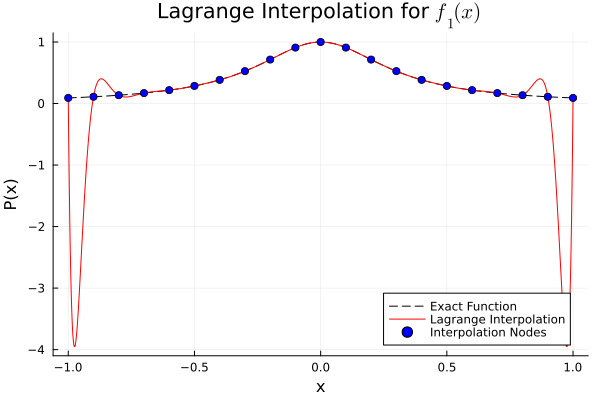

In [3]:
import Plots as Plt
import LaTeXStrings as ltx

# helper function for plotting
function lag_plot(I_start, I_end, x_nodes, f, title, density=1000)
    # Fine grid for evaluating P(x)
    x_dense = LinRange(I_start, I_end, density)

    # Value at nodes
    y_nodes = f.(x_nodes)

    # Calculate the interpolated function
    y_interp = lagrange_interpolant(x_nodes, y_nodes, x_dense);

    # Plot results
    Plt.plot(x_dense, f.(x_dense), label="Exact Function", linestyle=:dash, color=:black)
    Plt.plot!(x_dense, y_interp, label="Lagrange Interpolation", color=:red)
    Plt.scatter!(x_nodes, y_nodes, label="Interpolation Nodes", color=:blue)

    Plt.title!("Lagrange Interpolation for " * title)
    Plt.xlabel!("x")
    Plt.ylabel!("P(x)")
end

# Show f1
lag_plot(I_start, I_end, x_nodes, f1, ltx.L"f_1 (x)")

#### Function 2

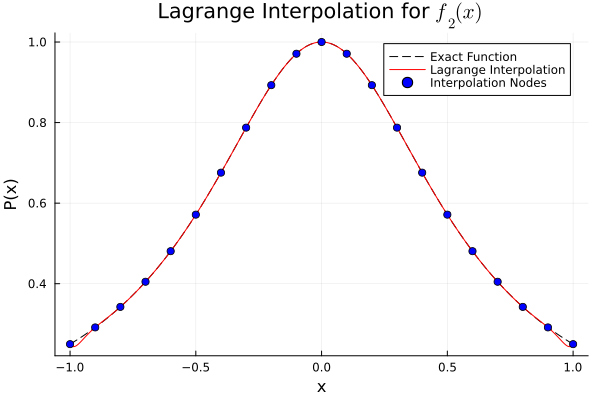

In [4]:
# Show f2
lag_plot(I_start, I_end, x_nodes, f2, ltx.L"f_2 (x)")

#### Function 3

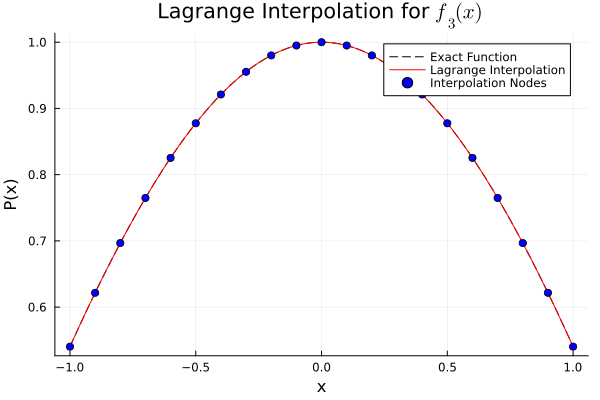

In [5]:
# Show f3
lag_plot(I_start, I_end, x_nodes, f3, ltx.L"f_3 (x)")

#### Function 4

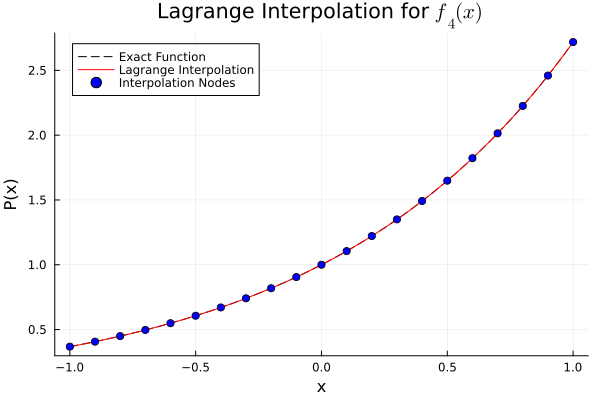

In [6]:
# Show f4
lag_plot(I_start, I_end, x_nodes, f4, ltx.L"f_4 (x)")

Runge's phenomenom of overshooting is observed in $f_1 (x)$ and $f_2 (x)$. This is due to the large slopes for those functions at $\pm$ 1.

### Part B

For the function $f_1 (x)$, calculate an approximation via interpolation with Lagrange polynomials as well as Chebyshev polynomials using 6 Chebyshev points within $[-1, 1]$, and plot both approximations along with the exact function on the same graph. Note that the Lagrange polynomials must use the same points as the Chebyshev polynomials. You may reuse any appropriate weekly notebooks available on Canvas. How do the approximations with Lagrange and Chebyshev polynomials compare to each other? Consider the accuracy of Lagrange interpolation from Part A and the current Lagrange interpolation with using 6 Chebyshev nodes, which on is better? Explain your observations based on function approximation theory.

Chebyshev nodes are given by:

$$
\begin{equation*}
  x_i = \cos \bigg ( \frac{(2 i + 1) \pi}{2 (n + 1)} \bigg ),
  \quad
  i = 0,\; 1,\; \ldots,\; n
\end{equation*}
$$

In [7]:
# Define function for chebyshev_nodes
function chebyshev_nodes(n, I_start, I_end)
    c_nodes = Float64[] # initialize list
    for i in range(0, n)
        x_i = cos(((2 * i + 1) * π) / (2 * (n + 1)))
        ans = (I_start + I_end) / 2 + ((I_end - I_start) / 2) * x_i
        push!(c_nodes, ans)
    end
    return c_nodes
end

# Calculate Chebyshev nodes
xc_nodes = chebyshev_nodes(6, I_start, I_end)

7-element Vector{Float64}:
  0.9749279121818236
  0.7818314824680298
  0.4338837391175582
  6.123233995736766e-17
 -0.43388373911755806
 -0.7818314824680295
 -0.9749279121818237

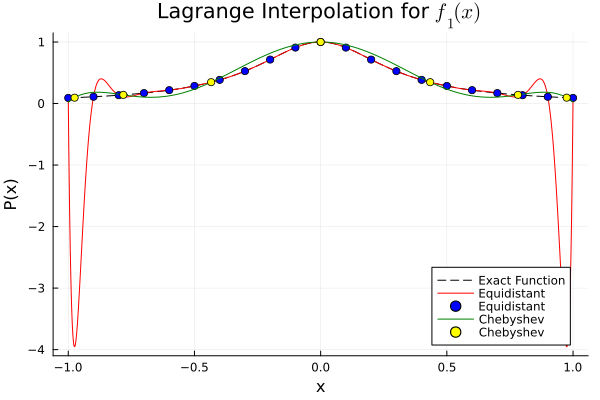

In [8]:
# helper function for plotting
function clag_plot(I_start, I_end, x_nodes, xc_nodes, f, title, density=1000)
    # Fine grid for evaluating P(x)
    x_dense = LinRange(I_start, I_end, density)

    # Value at nodes
    y_nodes = f.(x_nodes)

    # Value at Chebyshev nodes
    yc_nodes = f.(xc_nodes)

    # Calculate the interpolated function (Lagrange)
    y_interp = lagrange_interpolant(x_nodes, y_nodes, x_dense)

    # Calculate the interpolated function (Chebyshev)
    y_chebyshev = lagrange_interpolant(xc_nodes, yc_nodes, x_dense)

    # Plot results
    Plt.plot(x_dense, f.(x_dense), label="Exact Function", linestyle=:dash, color=:black)
    Plt.plot!(x_dense, y_interp, label="Equidistant", color=:red)
    Plt.scatter!(x_nodes, y_nodes, label="Equidistant", color=:blue)
    Plt.plot!(x_dense, y_chebyshev, label="Chebyshev", color=:green)
    Plt.scatter!(xc_nodes, yc_nodes, label="Chebyshev", color=:yellow)

    Plt.title!("Lagrange Interpolation for " * title)
    Plt.xlabel!("x")
    Plt.ylabel!("P(x)")
end

# Show f1
clag_plot(I_start, I_end, x_nodes, xc_nodes, f1, ltx.L"f_1 (x)")

The Chebyshev-based Lagrange interpolation provides better approximation than the equidistant-based Lagrange interpolation. Chebyshev nodes minimize the interpolation error by clustering more points near the edges where polynomial interpolation is typically unstable.

### Part C

For functions $f_1 (x)$ and $f_3 (x)$ given in Part A, derive the 1st, 2nd, and 3rd derivatives analytically (or use symbolic math software) and plot them in the interval $[-1, 1]$. Now, pick the point $x = -0.9$. What is the trend of derivatives for each function at this point, with increasing order of differentiaion? Do the values stay constant, increasing, or decreasing trend? Use this information to explain what you observed in Part A.

**Solve the derivatives analytically**

In [9]:
import Symbolics as sym

# define variables and equation
sym.@variables x
f1_sym = 1 / (1 + 10 * x^2)
f3_sym = cos(x)

# Symbollicaly solve for f'
df1_1 = sym.derivative(f1_sym, x)
print("First derivative of f1(x):")
display(df1_1)

df3_1 = sym.derivative(f3_sym, x)
print("First derivative of f3(x):")
display(df3_1)

# Symbollically solve for f''
df1_2 = sym.derivative(df1_1, x)
print("Second derivative of f1(x):")
display(df1_2)

df3_2 = sym.derivative(df3_1, x)
print("First derivative of f3(x):")
display(df3_2)

# Symbollically solve for f'''
df1_3 = sym.derivative(df1_2, x)
print("Third derivative of f1(x):")
display(df1_3)

df3_3 = sym.derivative(df3_2, x)
print("First derivative of f3(x):")
display(df3_3)

First derivative of f1(x):

-20x*(1 / ((1 + 10(x^2))^2))

First derivative of f3(x):

-sin(x)

Second derivative of f1(x):

-20 / ((1 + 10(x^2))^2) + 800(1 + 10(x^2))*(x^2)*(1 / ((1 + 10(x^2))^4))

First derivative of f3(x):

-cos(x)

Third derivative of f1(x):

(1600x) / ((1 + 10(x^2))^3) + (16000(x^3)) / ((1 + 10(x^2))^4) - 40x*(1 + 10(x^2))*(-20 / ((1 + 10(x^2))^4)) - 64000(x^3)*((1 + 10(x^2))^4)*(1 / ((1 + 10(x^2))^8))

First derivative of f3(x):

sin(x)

**Plot the functions**

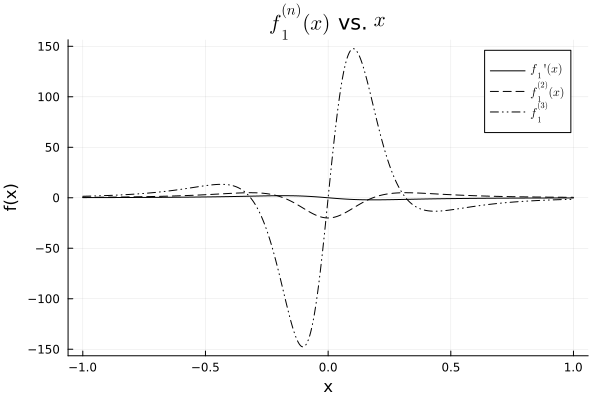

In [10]:
x = LinRange(I_start, I_end, 1000)

# f1 derivatives
f1_1(x) = -20x*(1 / ((1 + 10(x^2))^2))
f1_2(x) = -20 / ((1 + 10(x^2))^2) + 800(1 + 10(x^2))*(x^2)*(1 / ((1 + 10(x^2))^4))
f1_3(x) = (1600x) / ((1 + 10(x^2))^3) + (16000(x^3)) / ((1 + 10(x^2))^4) - 40x*(1 + 10(x^2))*(-20 / ((1 + 10(x^2))^4)) - 64000(x^3)*((1 + 10(x^2))^4)*(1 / ((1 + 10(x^2))^8))

# Plot the results
Plt.plot(x, f1_1.(x), label=ltx.L"f_{1}'(x)", linestyle=:solid, color=:black)
Plt.plot!(x, f1_2.(x), label=ltx.L"f_{1}^{(2)}(x)", linestyle=:dash, color=:black)
Plt.plot!(x, f1_3.(x), label=ltx.L"f_{1}^{(3)}", linestyle=:dashdotdot, color=:black)

Plt.title!(ltx.L"$f_{1}^{(n)}(x)$ vs. $x$")
Plt.xlabel!("x")
Plt.ylabel!("f(x)")

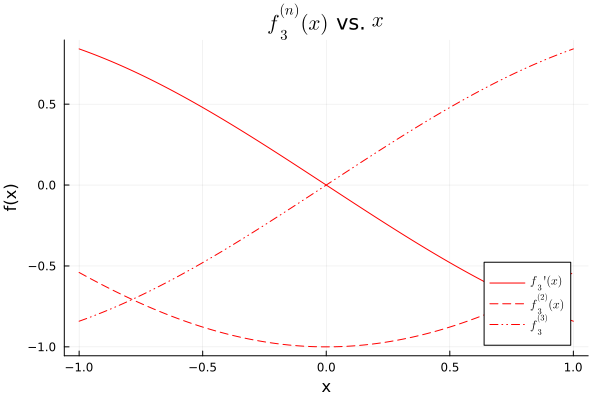

In [11]:
# f3 derivatives
f3_1(x) = -sin(x)
f3_2(x) = -cos(x)
f3_3(x) = sin(x)

# Plot results
Plt.plot(x, f3_1.(x), label=ltx.L"f_{3}'(x)", linestyle=:solid, color=:red)
Plt.plot!(x, f3_2.(x), label=ltx.L"f_{3}^{(2)}(x)", linestyle=:dash, color=:red)
Plt.plot!(x, f3_3.(x), label=ltx.L"f_{3}^{(3)}", linestyle=:dashdotdot, color=:red)

Plt.title!(ltx.L"$f_{3}^{(n)}(x)$ vs. $x$")
Plt.xlabel!("x")
Plt.ylabel!("f(x)")

For $f_1 (x)$ the derivatives oscillate with alternating increases and decreases. The higher-order derivatives grow rapidly in magnitude which is why polynomial interpolation struggles leading to the Runge's phenomenom seen in Part A.

For $f_3 (x)$ the derivative decrease in magnitude in a predictable pattern which explains why this did not suffer from Runge's phenomenon in Part A.

### Part D

Now for $x = 0.9$, calculate the expressions

$$
\begin{equation*}
  P_L (n) = \prod_{i = 0}^{n} (x - x_{i}^{L}),
  \quad
  P_C (n) = \prod_{i = 0}^{n} (x - x_{i}^{C})
\end{equation*}
$$

for $n = 4,\; 7,\; 10$, where $x_{i}^{L},\; i = 0,\; 1,\;, \ldots,\; n$ are the $n + 1$ equidistant Lagrange points and $x_{i}^{C},\; i = 0,\; 1,\; \ldots,\; n$ are the Chebyshev points between $[-1, 1]$. Plot $P_L (n)$, $P_C (n)$ as a function of $n$ running from 4, 7, 10 in the same plot. How do they compare to each other? Based on equation (2), can you explain why the interpolation on Chebyshev nodes is more accurate than interpolation on equidistant points?

In [12]:
# Evaluation point
x = 0.9

# points
ns = [4, 7, 10]

# P_L and P_C values (init)
P_L_values = []
P_C_values = []

# helper to compute product term
function P_n(x, nodes)
    return prod(x - xi for xi in nodes)
end
    
for n in ns
    x_L = LinRange(I_start, I_end, n + 1)
    x_C = chebyshev_nodes(n + 1, I_start, I_end)
    push!(P_L_values, abs(P_n(x, x_L))) # abs because I plan to use log plot
    push!(P_C_values, abs(P_n(x, x_C)))
end

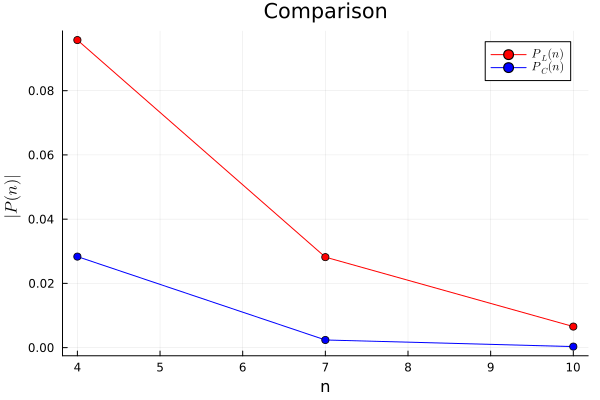

In [13]:
Plt.plot(ns, P_L_values, marker=:circle, label=ltx.L"P_{L}(n)", color=:red)
Plt.plot!(ns, P_C_values, marker=:circle, label=ltx.L"P_{C}(n)", color=:blue)
Plt.xlabel!("n")
Plt.ylabel!(ltx.L"|P(n)|")
Plt.title!("Comparison")

The plot shows that $P_L (n)$ remains significantly larger than $P_C (n)$, confirming that interpolation using equidistant points results in larger errors. Equation (2) explains this behavior: the interpolation error is proportional to $P(n)$, which grows rapidly for equidistant nodes but remains well-controlled for Chebyshev nodes. This is why Chebyshev interpolation is more accurate and avoids Runge’s phenomenon.

## Problem 2

### Analysis of B-Spline convergence with increasing order and knot number (Continuation of in-class exercise)

Let the following two function be defined on the interval $I = [-3, 3]$:

$$
\begin{equation*}
  f_1 (x) = \sin(x), \quad f_2 (x) = \cos(x^2)
\end{equation*}
$$

In the following, knots will be referring to points within the interval $I$ on which the exact function values are known and are used for B-Spline Interpolation of the functions given above.

### Part A

Use three equidistant knots within $I = [-3, 3]$ (with distance $d = 3$) to construct the B-Spline interpolated approximation for the function $f_1 (x) = \sin(x)$, with increasing B-Spline order $n = 2,3,4,5,6,7,8$. For each B-Spline order (i.e., $n = 2,3,\; \ldots,8$), evaluate the exact function and the B-Spline approximation to that exact function on an equidistant grid for $[-3, 3]$ with 1001 points ($x_0 = -3, \ldots, x_i, \ldots, x_{1000} = 3$). Calculate the maximal approximation error as $\mathrm{max}(|f_e (x_i) - F_B (x_i)|),\; i = 0, \ldots, 1000$, where $f_e$ is the exact function and $F_B$ is the B-Spline approximation of the exact function. Then plot the error $\epsilon (n)$ as a function of order $n$. In a seprate figure, plot the B-Spline approximations with order $n = 2, 3, 4, 5$ along with the exact function $f_1 (x)$ to visualize the quality of the interpolated approximations with increasing B-Spline order. Comment on your observations.

In [14]:
import BSplines as bs
import PlotlyLight as plt
plt.preset.template.plotly_dark!()

# Set up the spline interval
margin = 0.1e-6
startp = -3 - margin
endp = 3 + margin

# Define the function to evaluate
f(x) = sin(x)

# Number of knots
N = 3

# Define the spline nodes
h = (endp - startp) / (N + 1)
spline_nodes = range(startp, endp, step=h)

# Approximate the function at the spline nodes
spline_order = [i for i in range(2, 8)]
spline_basis = [bs.BSplineBasis(spline_order_, spline_nodes) for spline_order_ in spline_order]

# Approximate the function using splines
spline_approx = [bs.approximate(f, basis) for basis in spline_basis]

# Define the grid
x = LinRange(-3, 3, 1001)

# Define function to calculate maximal error
err_max(f_, x) = findmax(abs.(f_.(x) - f.(x)))[1]

# Calculate the maximal error for each order
err_max_spline_orders = [err_max(f_, x) for f_ in spline_approx]

# Plot the results
p = plt.plot(
    x = spline_order,
    y = err_max_spline_orders,
    type = "scatter",
    mode = "lines+markers",
)

p.layout.title.text = "Approximation Error vs. Order (N)"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "N"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [2, 3, 4, 5, 6, 7, 8], :y => [0.21083324085160604, 0.04809720026145836, 0.02018609705199148, 0.0025081781034277384, 0.0014402265801446434, 0.00010322993432498873, 3.8653613170458456e-5], :mode => "lines+markers")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation Error vs. Order (N)", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "N"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())

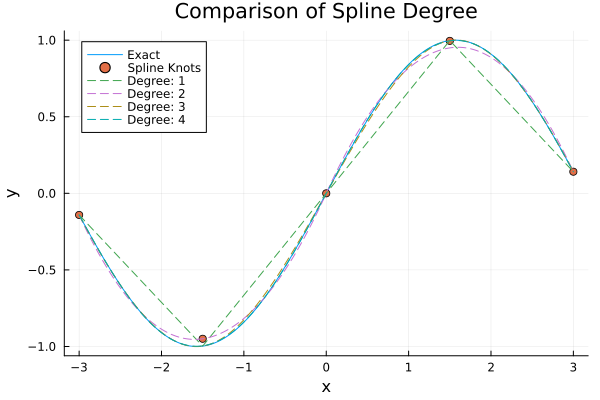

In [15]:
# Plot the results
Plt.plot(x, f.(x), label="Exact")
Plt.scatter!([i for i in spline_nodes], [spline_approx_.(i) for (spline_approx_, i) in zip(spline_approx, spline_nodes)],
label="Spline Knots")
Plt.plot!(x, spline_approx[1].(x), label="Degree: 1", linestyle=:dash)
Plt.plot!(x, spline_approx[2].(x), label="Degree: 2", linestyle=:dash)
Plt.plot!(x, spline_approx[3].(x), label="Degree: 3", linestyle=:dash)
Plt.plot!(x, spline_approx[4].(x), label="Degree: 4", linestyle=:dash)

Plt.title!("Comparison of Spline Degree")
Plt.xlabel!("x")
Plt.ylabel!("y")

Generally the interpolation fits the exact function better as the spline order increases. I plotted spline degree which is just order -1.

### Part B

For a fixed B-Spline order $n = 3$, vary the number of equidistant knots $m = 3,4,5,\ldots,13$ within the interval $I = [-3, 3]$ to construct the B-Spline interpolated approximation for the function $f_1 (x) = \sin(x)$. For each of the knots number $m$ used to construct the B-Spline interpolation, evaluate the exact function and the B-spline approximation to that exact function on an equidistant grid for [-3, 3] with 1001 points. Calculate the maximal approximation error. Then plot the error as a function of knots number $m$. Comment on your observations taking into account your observations from Part A. In terms of decreasing error, which strategy do would you prefer? Which one is more efficient?

In [16]:
# Set up the spline interval
margin = 1e4 # seems kinda weird...
startp = -3 - margin
endp = 3 + margin

# Number of points
N = 13
N_range = range(3, N)

# Define the spline nodes
h = [(endp - startp) / (n + 1) for n in N_range]
spline_nodes = [range(startp, endp, step=h_) for h_ in h]

# Approximate the function at the spline nodes
spline_order = 3
spline_basis = [bs.BSplineBasis(spline_order, spline_nodes_) for spline_nodes_ in spline_nodes]

# Approximate the function using splines
spline_approx = [bs.approximate(f, basis) for basis in spline_basis]

err_max_spline_knots = [err_max(f_, x) for f_ in spline_approx]

# Plot the results
p = plt.plot(
    x = N_range,
    y = err_max_spline_knots,
    type = "scatter",
    mode = "lines+markers",
)

p.layout.title.text = "Approximation Error vs. Knot Number (M)"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "M"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], :y => [0.9999727023823838, 1.0004226725487193, 0.9987440180505918, 1.0004527451342171, 0.9999727142294808, 1.0008606199374908, 0.9972335541980075, 0.9995704262078968, 1.0026571346959976, 1.0004621865664864, 1.0041135093485523], :mode => "lines+markers")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation Error vs. Knot Number (M)", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "M"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())

I would prefer to increase the spline order opposed to the number of knots. I also had a hard time finding a suitable margin to set up the splines as the number of knots increased.

### Part C

Repeat Part A, but now for the function $f_x (x) = \cos(x^2)$. How does the approximation error improve with increasing the B-Spline order $n$? How does this quality of approximation compare to the function $f_1 (x)$ used in Part A?

In [17]:
# Set up the spline interval
margin = 0.1e-6
startp = -3 - margin
endp = 3 + margin

# Define the function to evaluate
f(x) = cos(x^2)

# Number of knots
N = 3

# Define the spline nodes
h = (endp - startp) / (N + 1)
spline_nodes = range(startp, endp, step=h)

# Approximate the function at the spline nodes
spline_order = [i for i in range(2, 8)]
spline_basis = [bs.BSplineBasis(spline_order_, spline_nodes) for spline_order_ in spline_order]

# Approximate the function using splines
spline_approx = [bs.approximate(f, basis) for basis in spline_basis]

# Define the grid
x = LinRange(-3, 3, 1001)

# Define function to calculate maximal error
err_max(f_, x) = findmax(abs.(f_.(x) - f.(x)))[1]

# Calculate the maximal error for each order
err_max_spline_orders = [err_max(f_, x) for f_ in spline_approx]

# Plot the results
p = plt.plot(
    x = spline_order,
    y = err_max_spline_orders,
    type = "scatter",
    mode = "lines+markers",
)

p.layout.title.text = "Approximation Error vs. Order (N)"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "N"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [2, 3, 4, 5, 6, 7, 8], :y => [1.8187676824431214, 1.7345640174329413, 1.052562626363053, 0.9559929735667068, 0.6392950923726212, 0.5951085130669134, 0.17563971172485587], :mode => "lines+markers")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation Error vs. Order (N)", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "N"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())

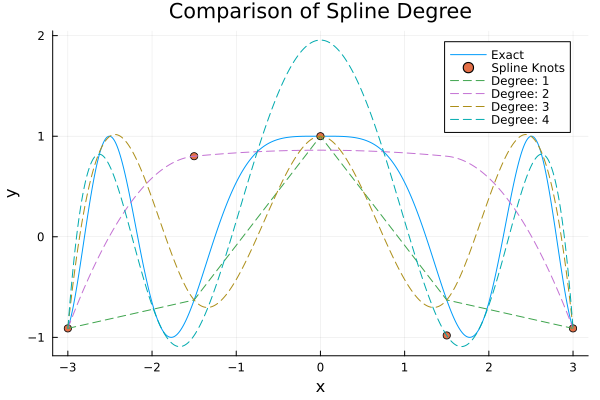

In [18]:
# Plot the results
Plt.plot(x, f.(x), label="Exact")
Plt.scatter!([i for i in spline_nodes], [spline_approx_.(i) for (spline_approx_, i) in zip(spline_approx, spline_nodes)],
label="Spline Knots")
Plt.plot!(x, spline_approx[1].(x), label="Degree: 1", linestyle=:dash)
Plt.plot!(x, spline_approx[2].(x), label="Degree: 2", linestyle=:dash)
Plt.plot!(x, spline_approx[3].(x), label="Degree: 3", linestyle=:dash)
Plt.plot!(x, spline_approx[4].(x), label="Degree: 4", linestyle=:dash)

Plt.title!("Comparison of Spline Degree")
Plt.xlabel!("x")
Plt.ylabel!("y")

It improves but not nearly as great as an improvement as in Part A. My thinking is that it must do with the fact that $\sin$ is odd and $\cos$ is even. It could also be the fact that this function is a higher frequency and the knots are not placed accurately.

### Part D

Repeat Part B, but now for the function $f_2 (x) = \cos(x^2))$. How does the approximation improve with increasing knot number for the B-Spline with order $n = 3$? How does the quality of approximation compare with function $f_1 (x)$?

In [19]:
# Set up the spline interval
margin = 1e4 # seems kinda weird...
startp = -3 - margin
endp = 3 + margin

# Number of points
N = 13
N_range = range(3, N)

# Define the spline nodes
h = [(endp - startp) / (n + 1) for n in N_range]
spline_nodes = [range(startp, endp, step=h_) for h_ in h]

# Approximate the function at the spline nodes
spline_order = 3
spline_basis = [bs.BSplineBasis(spline_order, spline_nodes_) for spline_nodes_ in spline_nodes]

# Approximate the function using splines
spline_approx = [bs.approximate(f, basis) for basis in spline_basis]

err_max_spline_knots = [err_max(f_, x) for f_ in spline_approx]

# Plot the results
p = plt.plot(
    x = N_range,
    y = err_max_spline_knots,
    type = "scatter",
    mode = "lines+markers",
)

p.layout.title.text = "Approximation Error vs. Knot Number (M)"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "M"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], :y => [1.5277783378276302, 1.9999619826641182, 1.7187582992355044, 1.999961302473627, 1.7505318083625052, 1.9999622259965029, 2.3138229426098436, 1.9999606539183827, 1.9091046331537957, 1.999962008015511, 1.0361254491816911], :mode => "lines+markers")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation Error vs. Knot Number (M)", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "M"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())

It isn't much better than Part A, but it does look like some critical threshold was met and the error is decreasing rapidly.

### Part E

Based on this exercise I would start with a higher order B-Spline but recognize thsi isn't a hard and fast rule. I would start here because it is easier to implement than increasing the knots. If the results aren't what I need, I would then keep the order a constant value and vary the knot size until I see a rapid decrease.  I would also consider if the function is odd or even.

## Problem 3

Standard Chebyshev polynomials are defined in the domain $x \in [-1, 1]$. If the problem is defined on a different domain such as $x \in [a, b]$, a transformation for the independent variable is needed.

To use Chebyshev interpolation for a general interval $x \in [a, b]$, we apply the affine transformation that maps $\psi \in [-1, 1]$ onto $[a, b]$ using the following transformation that shifts and scales Chebyshev points:

$$
\begin{equation*}
  x = a \frac{b - a}{2} (t + 1), \qquad t \in [-1, 1],
\end{equation*}
$$

and we redefine the interpolation abscissae as:

$$
\begin{equation*}
  a + \frac{b - a}{2}(x_i - 1) \to x_i, \qquad i=0, \ldots, n
\end{equation*}
$$

Let us now consider a different form of the Runge's function:

$$
\begin{equation*}
  f(x) = \frac{1}{1 + x^2}
\end{equation*}
$$

Use the above transformation to interpolate the Runge's function in the interval [-2, 5] using Chebyshev polynomials with 6 Chebyshev points. Plot both the exact function and the interpolation on the same graph.

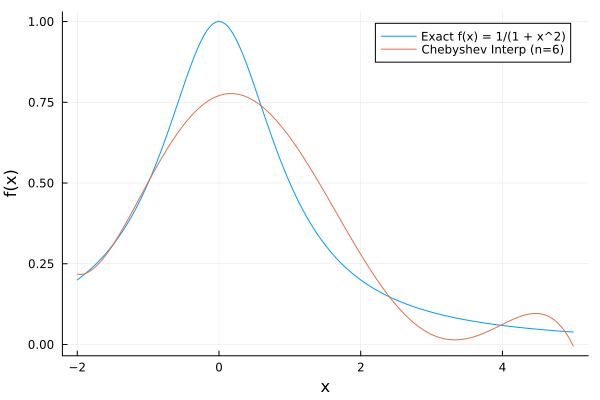

In [23]:
import Polynomials as polys

# Define the function to evaluate
f(x) = 1 / (1 + x^2)
a, b = -2, 5 # given interval

# Generate 6 Chebyshev points in [-1,1]
function chebyshev_points(n::Int)
    return [cos((2i + 1)*π / (2n)) for i in 0:n-1]
end

n = 6
t_cheb = chebyshev_points(n)  # 6 points in [-1,1]

# Transform each t to x in [a,b]
function map_to_interval(t, a, b)
    mid = (a + b) / 2
    half_range = (b - a) / 2
    return mid .+ half_range .* t
end
x_cheb = map_to_interval(t_cheb, a, b)  # Chebyshev nodes in [-2,5]

# Evaluate function at these nodes
fvals = f.(x_cheb)

# Construct interpolating polynomial using Polynomials (was going to use ApproxFun but
# that will handle this internally from my understanding and isn't the point of the assignment.
p = polys.fit(x_cheb, fvals)

# Plot the results
xplot = LinRange(a, b, 1001)
y_exact = f.(xplot)
y_interp = p.(xplot)

Plt.plot(xplot, y_exact, label="Exact f(x) = 1/(1 + x^2)", xlabel="x", ylabel="f(x)")
Plt.plot!(xplot, y_interp, label="Chebyshev Interp (n=6)")


For comparison here is another plot with 12 Chebyshev points, it is more accurate.

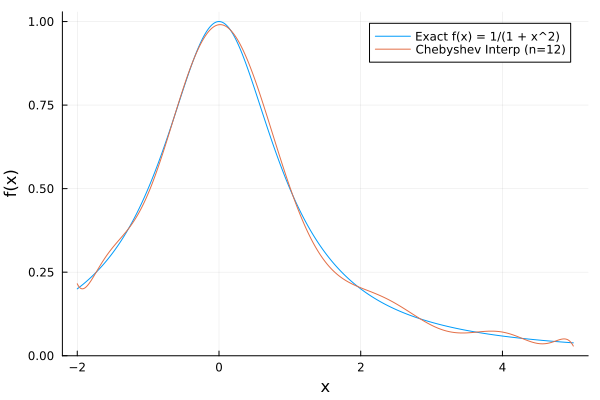

In [24]:
n = 12
t_cheb = chebyshev_points(n)  # 6 points in [-1,1]

x_cheb = map_to_interval(t_cheb, a, b)  # Chebyshev nodes in [-2,5]

# Evaluate function at these nodes
fvals = f.(x_cheb)

# Construct interpolating polynomial using Polynomials (was going to use ApproxFun but
# that will handle this internally from my understanding and isn't the point of the assignment.
p = polys.fit(x_cheb, fvals)

# Plot the results
xplot = LinRange(a, b, 1001)
y_exact = f.(xplot)
y_interp = p.(xplot)

Plt.plot(xplot, y_exact, label="Exact f(x) = 1/(1 + x^2)", xlabel="x", ylabel="f(x)")
Plt.plot!(xplot, y_interp, label="Chebyshev Interp (n=12)")
